# Import Libraries

In [253]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [254]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col = 0)

### Explore Data

In [255]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mths_since_earliest_cr_line_factor,mths

In [256]:
loan_data_targets_train.head()

,good_bad
128728,1
142160,1
194414,0
24101,1
176900,0


In [257]:
loan_data_inputs_train.shape

(187937, 322)

In [258]:
loan_data_targets_train.shape

(187937, 1)

In [259]:
loan_data_inputs_test.shape

(46985, 322)

In [260]:
loan_data_targets_test.shape

(46985, 1)

### Selecting the Features

In [261]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [262]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [263]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
128728,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,False,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
142160,False,True,False,False,False,False,True,False,0,False,0,False,0,0,0,1,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
194414,False,True,False,False,False,False,False,False,0,False,1,False,0,0,0,0,0,False,0,0,0,True,False,False,False,1,0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
24101,True,False,False,False,False,False,False,True,0,False,0,False,0,0,0,0,1,False,0,0,0,True,False,False,False,0,0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
176900,True,False,False,False,False,False,False,True,0,False,1,False,0,0,0,0,0,False,0,0,0,False,False,True,False,0,0,True,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1


# PD Model Estimation

## Logistic Regression

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [265]:
reg = LogisticRegression()

In [266]:
pd.options.display.max_rows = None

In [267]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [268]:
reg.intercept_

array([-0.69180627])

In [269]:
reg.coef_

array([[ 0.8772808 ,  0.96919616,  0.8268689 ,  0.6070118 ,  0.37911118,
         0.1983038 ,  0.07827201,  0.056623  ,  0.11130083,  0.06715173,
         0.11234586,  0.06384188,  0.06024216,  0.18725285,  0.11624755,
         0.17918093,  0.28932757,  0.24113082,  0.23800709,  0.35622584,
         0.50257993,  0.04907614,  0.0144056 ,  0.46145985,  0.3007351 ,
         0.24601239,  0.37118971,  0.12294215,  0.22588962,  0.07221525,
         0.06876989,  0.03477895,  0.02861007,  0.04837141,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.94768335,  0.33948694,  0.09065835, -0.06940728,
         0.02997186, -0.04572014, -0.06453069, -0.04147221, -0.01698568,
        -0.23005986, -0.20255321,  0.59340309,  0.4111816 ,  0.18548989,
        -0.01945923, -0.05489952, -0.09736678, -0.12047034, -0.1137361 ,
        -0.13527436, -0.0872322 ,  0.07385855,  0.14567984, -0.01304369,
         0.0808423 ,  0.09613437,  0.03112385,  0.0

In [270]:
feature_name = inputs_train.columns.values

In [271]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.691806
1,grade:A,0.877281
2,grade:B,0.969196
3,grade:C,0.826869
4,grade:D,0.607012
5,grade:E,0.379111
6,grade:F,0.198304
7,home_ownership:OWN,0.078272
8,home_ownership:MORTGAGE,0.056623
9,addr_state:NM_VA,0.111301


## Build a Logistic Regression Model with P-Values

In [272]:
from sklearn import linear_model
import scipy.stats as stat
import numpy as np  # FIX 1: Import numpy

class LogisticRegression_with_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # FIX 2: Force X to be numeric (floats) to prevent 'dtype object' error
        X = np.array(X, dtype=float)

        # FIX 3: Flatten y to prevent DataConversionWarning
        y = np.array(y).ravel()

        self.model.fit(X, y)

        # Calculate P-Values
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T

        # Calculate Fisher Information Matrix
        F_ij = np.dot((X / denom).T, X)

        # Inverse Information Matrix
        # Added epsilon for stability in case of slight multicollinearity
        epsilon = 1e-9
        Cramer_Rao = np.linalg.inv(F_ij + np.eye(F_ij.shape[0]) * epsilon)

        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [273]:
reg = LogisticRegression_with_p_values()

In [274]:
print(inputs_train.apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum().sum())

0


In [275]:
reg.fit(inputs_train, loan_data_targets_train)

In [276]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.691806
1,grade:A,0.877281
2,grade:B,0.969196
3,grade:C,0.826869
4,grade:D,0.607012
5,grade:E,0.379111
6,grade:F,0.198304
7,home_ownership:OWN,0.078272
8,home_ownership:MORTGAGE,0.056623
9,addr_state:NM_VA,0.111301


In [277]:
p_values = reg.p_values

In [278]:
p_values = np.append(np.nan, np.array(p_values))

In [279]:
summary_table['p_values'] = p_values

In [280]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.691806,NaN
1,grade:A,0.877281,3.137858e-08
2,grade:B,0.969196,2.836303e-36
3,grade:C,0.826869,4.744675e-30
4,grade:D,0.607012,1.324343e-17
5,grade:E,0.379111,2.731080e-09
6,grade:F,0.198304,2.999474e-03
7,home_ownership:OWN,0.078272,3.238589e-03
8,home_ownership:MORTGAGE,0.056623,5.693158e-04
9,addr_state:NM_VA,0.111301,7.328007e-03


In [281]:
##only include statistically significant independent variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [282]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [283]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
128728,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,False,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
142160,False,True,False,False,False,False,True,False,0,False,0,False,0,0,0,1,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
194414,False,True,False,False,False,False,False,False,0,False,1,False,0,0,0,0,0,False,0,0,0,True,False,False,False,1,0,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
24101,True,False,False,False,False,False,False,True,0,False,0,False,0,0,0,0,1,False,0,0,0,True,False,False,False,0,0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
176900,True,False,False,False,False,False,False,True,0,False,1,False,0,0,0,0,0,False,0,0,0,False,False,True,False,0,0,True,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [284]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [285]:
feature_name = inputs_train.columns.values

In [286]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.949775
1,grade:A,0.929424
2,grade:B,1.035718
3,grade:C,0.877054
4,grade:D,0.646960
5,grade:E,0.399018
6,grade:F,0.212496
7,home_ownership:OWN,0.087782
8,home_ownership:MORTGAGE,0.063381
9,addr_state:NM_VA,0.112285


In [287]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.949775,NaN
1,grade:A,0.929424,5.627262e-09
2,grade:B,1.035718,7.162187e-42
3,grade:C,0.877054,4.097283e-34
4,grade:D,0.646960,4.536885e-20
5,grade:E,0.399018,2.433634e-10
6,grade:F,0.212496,1.308744e-03
7,home_ownership:OWN,0.087782,9.349709e-04
8,home_ownership:MORTGAGE,0.063381,1.073798e-04
9,addr_state:NM_VA,0.112285,6.743472e-03


In [288]:
import pickle

In [289]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [290]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [291]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [292]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
143227,False,False,False,True,False,False,False,False,0,True,0,False,0,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
109046,False,True,False,False,False,False,False,False,0,True,0,False,0,0,0,0,0,False,0,0,0,True,False,True,False,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
134197,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,True,False,0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
57389,False,True,False,False,False,False,True,False,0,False,0,False,0,0,0,0,0,False,1,0,0,False,False,False,True,0,0,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
204425,False,True,False,False,False,False,False,False,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [293]:
y_hat_test = reg2.model.predict(inputs_test) ##predicted outputs

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [294]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [295]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [296]:
y_hat_test_proba

array([[0.27078104, 0.72921896],
       [0.08121177, 0.91878823],
       [0.05507027, 0.94492973],
       ...,
       [0.0510328 , 0.9489672 ],
       [0.18902399, 0.81097601],
       [0.1193291 , 0.8806709 ]])

In [297]:
y_hat_test_proba[: ][: , 1]

array([0.72921896, 0.91878823, 0.94492973, ..., 0.9489672 , 0.81097601,
       0.8806709 ])

In [298]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [299]:
y_hat_test_proba   ##predicted outputs for probability

array([0.72921896, 0.91878823, 0.94492973, ..., 0.9489672 , 0.81097601,
       0.8806709 ])

In [300]:
loan_data_targets_test_temp = loan_data_targets_test ##actual outputs

In [301]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [302]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [303]:
df_actual_predicted_probs.shape

(46985, 2)

In [304]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [305]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [306]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
143227,1,0.729219
109046,0,0.918788
134197,1,0.944930
57389,1,0.938936
204425,1,0.818655


### Accuracy and Area under the Curve

In [307]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [308]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5151,1168
1,24327,16339


In [309]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.109631,0.024859
1,0.517761,0.347749


In [310]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.4573800148983718)

In [311]:
from sklearn.metrics import roc_curve, roc_auc_score

In [312]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99968349, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.45905671e-05, 2.53282841e-03, ...,
        9.99950819e-01, 9.99950819e-01, 1.00000000e+00]),
 array([       inf, 0.98404078, 0.976308  , ..., 0.49077648, 0.44855287,
        0.42294134]))

In [313]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

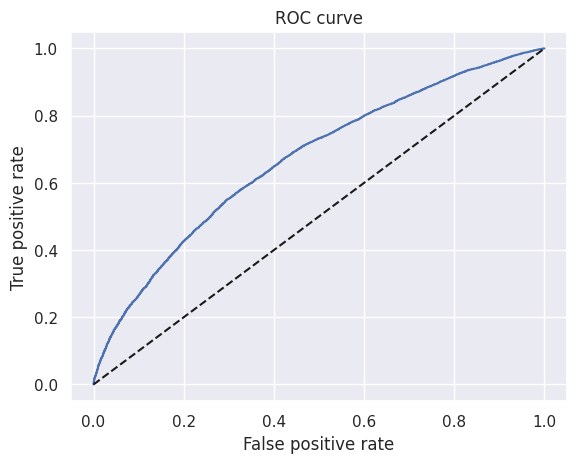

In [315]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [316]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

np.float64(0.6703694434804048)

### Gini and Kolmogorov-Smirnov

In [317]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [318]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.422941,0
41890,1,0.425822,0
42396,0,0.448553,0
41197,0,0.486659,0
107466,1,0.490776,0


In [319]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
14221,1,0.981821,1
48326,1,0.982065,1
140941,1,0.982498,1
46409,1,0.982852,1
112787,1,0.984041,1


In [320]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [321]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.422941,0
1,41890,1,0.425822,0
2,42396,0,0.448553,0
3,41197,0,0.486659,0
4,107466,1,0.490776,0


In [322]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [323]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.422941,0,1,1,0
1,41890,1,0.425822,0,2,2,0
2,42396,0,0.448553,0,3,2,1
3,41197,0,0.486659,0,4,2,2
4,107466,1,0.490776,0,5,3,2


In [324]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [325]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.422941,0,1,1,0,0.000021,0.000025,0.000000
1,41890,1,0.425822,0,2,2,0,0.000043,0.000049,0.000000
2,42396,0,0.448553,0,3,2,1,0.000064,0.000049,0.000158
3,41197,0,0.486659,0,4,2,2,0.000085,0.000049,0.000317
4,107466,1,0.490776,0,5,3,2,0.000106,0.000074,0.000317


In [326]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
46980,14221,1,0.981821,1,46981,40662,6319,0.999915,0.999902,1.0
46981,48326,1,0.982065,1,46982,40663,6319,0.999936,0.999926,1.0
46982,140941,1,0.982498,1,46983,40664,6319,0.999957,0.999951,1.0
46983,46409,1,0.982852,1,46984,40665,6319,0.999979,0.999975,1.0
46984,112787,1,0.984041,1,46985,40666,6319,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

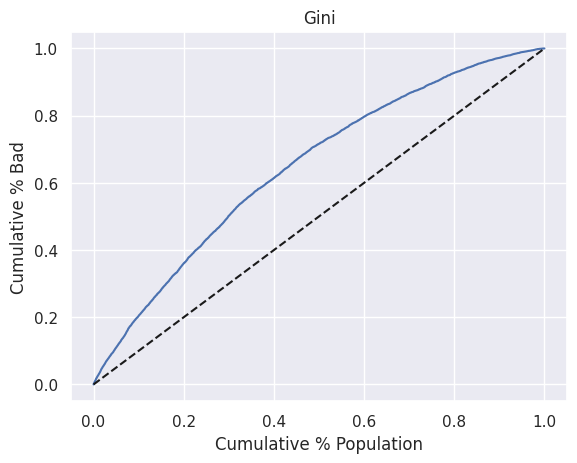

In [327]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [328]:
Gini = AUROC * 2 - 1
Gini

np.float64(0.3407388869608097)

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

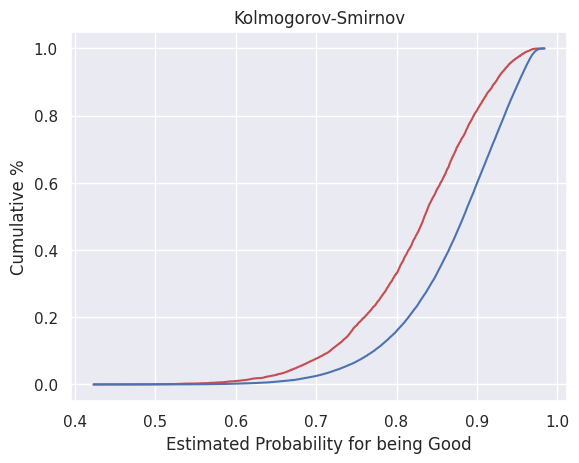

In [329]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [330]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.25430999401973287

# Applying the PD Model (Scorecard)

### Calculating PD of individual accounts

In [331]:
pd.options.display.max_columns = None

In [332]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
143227,False,False,False,True,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
109046,False,True,False,False,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
134197,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
57389,False,True,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,False,1,0,0,False,False,True,0,False,True,0,0,False,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
204425,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [333]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.949775,NaN
1,grade:A,0.929424,5.627262e-09
2,grade:B,1.035718,7.162187e-42
3,grade:C,0.877054,4.097283e-34
4,grade:D,0.646960,4.536885e-20
5,grade:E,0.399018,2.433634e-10
6,grade:F,0.212496,1.308744e-03
7,home_ownership:OWN,0.087782,9.349709e-04
8,home_ownership:MORTGAGE,0.063381,1.073798e-04
9,addr_state:NM_VA,0.112285,6.743472e-03


In [334]:
y_hat_test_proba

array([0.72921896, 0.91878823, 0.94492973, ..., 0.9489672 , 0.81097601,
       0.8806709 ])

### Creating a Scorecard

In [335]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.949775,NaN
1,grade:A,0.929424,5.627262e-09
2,grade:B,1.035718,7.162187e-42
3,grade:C,0.877054,4.097283e-34
4,grade:D,0.646960,4.536885e-20
5,grade:E,0.399018,2.433634e-10
6,grade:F,0.212496,1.308744e-03
7,home_ownership:OWN,0.087782,9.349709e-04
8,home_ownership:MORTGAGE,0.063381,1.073798e-04
9,addr_state:NM_VA,0.112285,6.743472e-03


In [336]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [337]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [338]:
df_scorecard = pd.concat([summary_table, df_ref_categories]) ##include the reference category
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.949775,NaN
1,1,grade:A,0.929424,5.627262e-09
2,2,grade:B,1.035718,7.162187e-42
3,3,grade:C,0.877054,4.097283e-34
4,4,grade:D,0.646960,4.536885e-20
5,5,grade:E,0.399018,2.433634e-10
6,6,grade:F,0.212496,1.308744e-03
7,7,home_ownership:OWN,0.087782,9.349709e-04
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04
9,9,addr_state:NM_VA,0.112285,6.743472e-03


In [339]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [340]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.949775,NaN,Intercept
1,1,grade:A,0.929424,5.627262e-09,grade
2,2,grade:B,1.035718,7.162187e-42,grade
3,3,grade:C,0.877054,4.097283e-34,grade
4,4,grade:D,0.646960,4.536885e-20,grade
5,5,grade:E,0.399018,2.433634e-10,grade
6,6,grade:F,0.212496,1.308744e-03,grade
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state


In [341]:
min_score = 300
max_score = 850

In [342]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

,Coefficients
Original feature name,
Intercept,-0.949775
acc_now_delinq,0.000000
addr_state,0.000000
annual_inc,0.000000
dti,-0.296364
emp_length,0.000000
grade,0.000000
home_ownership,0.000000
initial_list_status,0.000000


In [343]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

np.float64(-1.3973452115214005)

In [344]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

,Coefficients
Original feature name,
Intercept,-0.949775
acc_now_delinq,0.135631
addr_state,0.519033
annual_inc,0.852735
dti,0.000000
emp_length,0.075953
grade,1.035718
home_ownership,0.087782
initial_list_status,0.139520


In [345]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

np.float64(4.975614249148154)

In [346]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.949775,NaN,Intercept,-81.967608
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468


In [347]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/tmp/ipython-input-1263832758.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_sco

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.949775,NaN,Intercept,338.626265
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468


In [348]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.949775,NaN,Intercept,338.626265,339.0
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251,80.0
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687,89.0
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656,76.0
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020,56.0
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072,34.0
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873,18.0
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734,8.0
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914,5.0
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468,10.0


In [349]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

np.float64(300.0)

In [350]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max(). sum()
max_sum_score_prel

np.float64(852.0)

In [351]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.949775,NaN,Intercept,338.626265,339.0,0.373735
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251,80.0,-0.211251
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687,89.0,-0.384687
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656,76.0,0.308344
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020,56.0,0.165980
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072,34.0,-0.436072
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873,18.0,-0.338873
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734,8.0,0.424266
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914,5.0,-0.469914
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468,10.0,0.309532


In [352]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][58] = 31
df_scorecard['Score - Final'][57] = 23
df_scorecard

/tmp/ipython-input-3396047484.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][58] = 31
/tmp/ipython-input-3396047484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.949775,NaN,Intercept,338.626265,339.0,0.373735,339.0
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251,80.0,-0.211251,80.0
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687,89.0,-0.384687,89.0
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656,76.0,0.308344,76.0
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020,56.0,0.165980,56.0
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072,34.0,-0.436072,34.0
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873,18.0,-0.338873,18.0
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734,8.0,0.424266,8.0
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914,5.0,-0.469914,5.0
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468,10.0,0.309532,10.0


In [353]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

np.float64(300.0)

In [354]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max(). sum()
max_sum_score_prel

np.float64(852.0)

### Caclulating Credit Score

In [355]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
143227,False,False,False,True,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
109046,False,True,False,False,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
134197,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
57389,False,True,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,False,1,0,0,False,False,True,0,False,True,0,0,False,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
204425,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [356]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.949775,NaN,Intercept,338.626265,339.0,0.373735,339.0
1,1,grade:A,0.929424,5.627262e-09,grade,80.211251,80.0,-0.211251,80.0
2,2,grade:B,1.035718,7.162187e-42,grade,89.384687,89.0,-0.384687,89.0
3,3,grade:C,0.877054,4.097283e-34,grade,75.691656,76.0,0.308344,76.0
4,4,grade:D,0.646960,4.536885e-20,grade,55.834020,56.0,0.165980,56.0
5,5,grade:E,0.399018,2.433634e-10,grade,34.436072,34.0,-0.436072,34.0
6,6,grade:F,0.212496,1.308744e-03,grade,18.338873,18.0,-0.338873,18.0
7,7,home_ownership:OWN,0.087782,9.349709e-04,home_ownership,7.575734,8.0,0.424266,8.0
8,8,home_ownership:MORTGAGE,0.063381,1.073798e-04,home_ownership,5.469914,5.0,-0.469914,5.0
9,9,addr_state:NM_VA,0.112285,6.743472e-03,addr_state,9.690468,10.0,0.309532,10.0


In [357]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [358]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [359]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
143227,1,False,False,False,True,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
109046,1,False,True,False,False,False,False,False,1,False,False,0,0,True,0,False,0,0,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
134197,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,True,False,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
57389,1,False,True,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,False,1,0,0,False,False,True,0,False,True,0,0,False,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
204425,1,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [360]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [361]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
143227,1,False,False,False,True,False,False,False,False,0,True,0,False,0,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,False,1,0,True,0,True,1,0,1,0,0,0,1,0,0,0,0
109046,1,False,True,False,False,False,False,False,False,0,True,0,False,0,0,0,0,0,False,0,0,0,True,False,True,False,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,False,1,0,False,0,True,0,0,1,0,0,0,1,0,0,0,0
134197,1,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,True,False,0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,False,0,True,0,1,1,0,0,0,1,0,0,0,0
57389,1,False,True,False,False,False,False,True,False,0,False,0,False,0,0,0,0,0,False,1,0,0,False,False,False,True,0,0,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,False,0,0,True,0,False,0,1,1,0,0,0,1,0,0,0,0
204425,1,False,True,False,False,False,False,False,False,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,False,1,0,True,0,True,1,0,1,0,0,0,1,0,0,0,0


In [362]:
scorecard_scores = df_scorecard['Score - Final']

In [363]:
inputs_test_with_ref_cat_w_intercept.shape

(46985, 102)

In [364]:
scorecard_scores.shape

(102,)

In [365]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [366]:
scorecard_scores.shape

(102, 1)

In [367]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [368]:
y_scores.head()

,0
143227,505.0
109046,629.0
134197,665.0
57389,656.0
204425,550.0


In [369]:
y_scores.tail()

,0
158121,699.0
10064,609.0
55895,671.0
135074,546.0
140223,593.0


### From Credit Score to PD

In [370]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [371]:
sum_coef_from_score = sum_coef_from_score.astype(float)

y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
143227,0.726717
109046,0.917952
134197,0.944380
57389,0.938641
204425,0.817493


In [372]:
y_hat_test_proba[0: 5]

array([0.72921896, 0.91878823, 0.94492973, 0.93893569, 0.81865493])

In [373]:
df_actual_predicted_probs['y_hat_test_proba'].head()

,y_hat_test_proba
0,0.422941
1,0.425822
2,0.448553
3,0.486659
4,0.490776


### Setting Cut-offs - Who to give?

In [374]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [375]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5151,1168
1,24327,16339


In [376]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.109631,0.024859
1,0.517761,0.347749


In [377]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.4573800148983718)

In [378]:
from sklearn.metrics import roc_curve, roc_auc_score

In [379]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99968349, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.45905671e-05, 2.53282841e-03, ...,
        9.99950819e-01, 9.99950819e-01, 1.00000000e+00]),
 array([       inf, 0.98404078, 0.976308  , ..., 0.49077648, 0.44855287,
        0.42294134]))

In [380]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

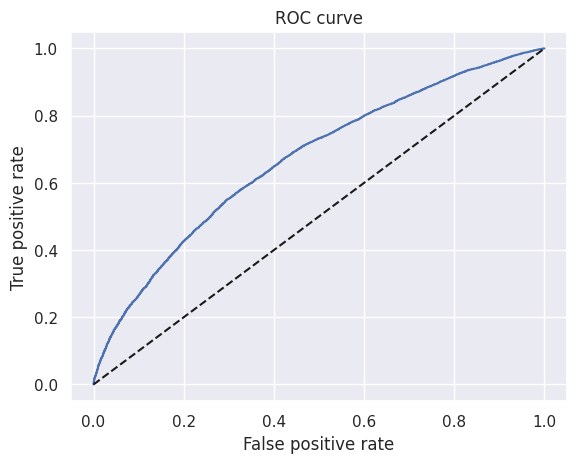

In [382]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [383]:
thresholds

array([       inf, 0.98404078, 0.976308  , ..., 0.49077648, 0.44855287,
       0.42294134])

In [384]:
thresholds.shape

(10665,)

In [385]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [386]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [387]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.984041,0.000000,0.000025
2,0.976308,0.000000,0.002533
3,0.976283,0.000158,0.002533
4,0.975589,0.000158,0.003393


In [388]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

/tmp/ipython-input-3197044947.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [389]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [390]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3591.0
1,0.984041,0.000000,0.000025,776.0
2,0.976308,0.000000,0.002533,742.0
3,0.976283,0.000158,0.002533,741.0
4,0.975589,0.000158,0.003393,739.0


In [391]:
df_cutoffs['Score'][0] = max_score

/tmp/ipython-input-3137964156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [392]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.984041,0.000000,0.000025,776.0
2,0.976308,0.000000,0.002533,742.0
3,0.976283,0.000158,0.002533,741.0
4,0.975589,0.000158,0.003393,739.0


In [393]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
10660,0.500370,0.999367,0.999926,421.0
10661,0.498601,0.999683,0.999926,420.0
10662,0.490776,0.999683,0.999951,417.0
10663,0.448553,1.000000,0.999951,403.0
10664,0.422941,1.000000,1.000000,394.0


In [394]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [395]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [396]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,46985,0.000000,1.000000
1,0.984041,0.000000,0.000025,776.0,1,46984,0.000021,0.999979
2,0.976308,0.000000,0.002533,742.0,103,46882,0.002192,0.997808
3,0.976283,0.000158,0.002533,741.0,104,46881,0.002213,0.997787
4,0.975589,0.000158,0.003393,739.0,139,46846,0.002958,0.997042


In [397]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
10660,0.500370,0.999367,0.999926,421.0,46978,7,0.999851,0.000149
10661,0.498601,0.999683,0.999926,420.0,46980,5,0.999894,0.000106
10662,0.490776,0.999683,0.999951,417.0,46981,4,0.999915,0.000085
10663,0.448553,1.000000,0.999951,403.0,46983,2,0.999957,0.000043
10664,0.422941,1.000000,1.000000,394.0,46985,0,1.000000,0.000000


In [398]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.849054,0.425700,0.675331,570.0,30153,16832,0.641758,0.358242
5001,0.849026,0.425700,0.675552,570.0,30162,16823,0.641950,0.358050
5002,0.849025,0.425859,0.675552,570.0,30163,16822,0.641971,0.358029
5003,0.849020,0.425859,0.675577,570.0,30164,16821,0.641992,0.358008
5004,0.849020,0.426017,0.675577,570.0,30165,16820,0.642013,0.357987
5005,0.848954,0.426017,0.675872,570.0,30177,16808,0.642269,0.357731
5006,0.848947,0.426175,0.675872,570.0,30178,16807,0.642290,0.357710
5007,0.848943,0.426175,0.675946,570.0,30181,16804,0.642354,0.357646
5008,0.848929,0.426333,0.675946,570.0,30182,16803,0.642375,0.357625
5009,0.848916,0.426333,0.675995,570.0,30184,16801,0.642418,0.357582


In [399]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.928678,0.079601,0.232258,642.0,9948,37037,0.211727,0.788273
1001,0.928677,0.079759,0.232258,642.0,9949,37036,0.211748,0.788252
1002,0.928556,0.079759,0.232897,642.0,9975,37010,0.212302,0.787698
1003,0.928554,0.079918,0.232897,642.0,9976,37009,0.212323,0.787677
1004,0.928487,0.079918,0.233291,642.0,9992,36993,0.212664,0.787336
1005,0.928487,0.080076,0.233291,642.0,9993,36992,0.212685,0.787315
1006,0.928431,0.080076,0.233733,642.0,10011,36974,0.213068,0.786932
1007,0.928425,0.080234,0.233733,642.0,10012,36973,0.213089,0.786911
1008,0.928275,0.080234,0.234545,642.0,10045,36940,0.213792,0.786208
1009,0.928267,0.080392,0.234545,642.0,10046,36939,0.213813,0.786187


In [400]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [401]:
df_scorecard.to_csv('df_scorecard.csv')